In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
batting = pd.read_csv("data/Batting.csv")
salaries = pd.read_csv("data/Salaries.csv")
master = pd.read_csv("data/Master.csv")
appearances = pd.read_csv("data/Appearances.csv")

In [27]:
batting_1988 = batting[batting.yearID.isin([1988])]
salaries_1988 = salaries[salaries.yearID.isin([1988])]
appearances_1988 = appearances[appearances.yearID.isin([1988])]
master = master.drop(["birthYear", "birthMonth", "birthDay", "birthCountry", "birthState", "birthCity", "deathYear", "deathMonth", "deathDay", "weight", "height", "bats", "throws", "debut", "finalGame", "retroID", "bbrefID"], axis=1)
master = master.drop(["deathCountry", "deathState", "deathCity", "nameGiven"], axis=1)

In [28]:
everything = pd.merge(batting_1988, salaries_1988, how="inner", left_on="playerID", right_on="playerID")
everything = pd.merge(everything, appearances_1988, how="inner", left_on="playerID", right_on="playerID")
everything = everything.set_index(["playerID"])
everything = everything.drop(["stint", "teamID_x", "lgID_x", "yearID_y", "teamID_y", "lgID_y"], axis=1)
everything = everything.drop(["yearID", "teamID", "lgID", "G_all", "GS", "G_batting", "G_defense", "G_pr", "G_ph", "G_dh"], axis=1)
everything = everything.drop(["R", "2B", "3B", "HR", "RBI", "SB", "CS", "SO", "SH", "GIDP", "IBB"], axis=1)
everything["OBP"] = (everything.H + everything.HBP + everything.BB) / (everything.AB + everything.BB + everything.HBP +everything.SF)
everything = everything[pd.notnull(everything['OBP'])]
everything = everything.drop(["H", "BB", "HBP", "SF"], axis=1)

In [5]:
everything_pitchers =everything.drop(everything[everything.G_p <= 1].index)
everything_pitchers = everything_pitchers.drop(["G_c", "G_1b", "G_c", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf", "G_of"], axis=1)
everything_pitchers = pd.merge(everything_pitchers, master, how="inner", left_index=True, right_on="playerID")
everything_pitchers = everything_pitchers.set_index(["playerID"])
everything_pitchers = everything_pitchers.sort(columns="OBP", axis=0, ascending=False)

In [6]:
everything_hitters = everything.drop(everything[everything.G < 80].index)
everything_hitters = everything_hitters.sort(columns='OBP', axis=0, ascending=False)
everything_hitters = pd.merge(everything_hitters, master, how="inner", left_index=True, right_on="playerID")
everything_hitters = everything_hitters.set_index(["playerID"])

In [ ]:
with pd.option_context('display.max_rows', 999, 'display.max_columns', 20):
    print(everything_pitchers)

In [7]:
everything2 = everything_hitters.drop(["G_p", "G_of", "AB"], axis=1)
everything2 = everything2[["nameFirst", "nameLast", "OBP", "salary"]]
everything3 = everything_hitters[["G_c", "G_1b", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf"]]

In [ ]:
with pd.option_context('display.max_rows', 999, 'display.max_columns', 20):
    print(everything2)

In [ ]:
with pd.option_context('display.max_rows', 999, 'display.max_columns', 20):
    print(everything3)

In [43]:
my_team = {"Position": ["1B", "2B", "3B", "SS", "LF", "CF", "RF", "C", "P"],  "Player": ["Will Clark", "Jose Oquendo", "Kevin Sietzer", "Jody Reed", "Mike Greenwell", "Ellis Burks", "Jose Canseco", "Geno Petralli", "Sid Fernandez"], "Salary": [320000, 275000, 175000, 64500, 205000, 125000, 325000, 135000, 580000], "OBP": [0.386, 0.350, 0.386, 0.380, 0.416, 0.367, 0.390, 0.356, 0.308]}
team_frame = pd.DataFrame.from_dict(my_team)
team_frame

,OBP,Player,Position,Salary
0,0.386,Will Clark,1B,320000
1,0.350,Jose Oquendo,2B,275000
2,0.386,Kevin Sietzer,3B,175000
3,0.380,Jody Reed,SS,64500
4,0.416,Mike Greenwell,LF,205000
5,0.367,Ellis Burks,CF,125000
6,0.390,Jose Canseco,RF,325000
7,0.356,Geno Petralli,C,135000
8,0.308,Sid Fernandez,P,580000


In [10]:
team_frame.mean()

OBP            0.371000
Salary    244944.444444
dtype: float64

In [11]:
team_avg_salary = round(244944.444444, 2)
team_avg_obp = 0.371

In [13]:
salary_avg = salaries.set_index(["yearID"])
salary_avg = salary_avg.drop(["teamID", "lgID", "playerID"], axis=1)
mean_salary_1988 = salary_avg.mean(axis=0)
mean_salary_1988

salary    453171.076923
dtype: float64

In [14]:
mean_salary_1988 = round(453171.076923, 2)
mean_salary_1988

453171.08

/Users/ZSeaborn/Desktop/Homework/moneyball/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


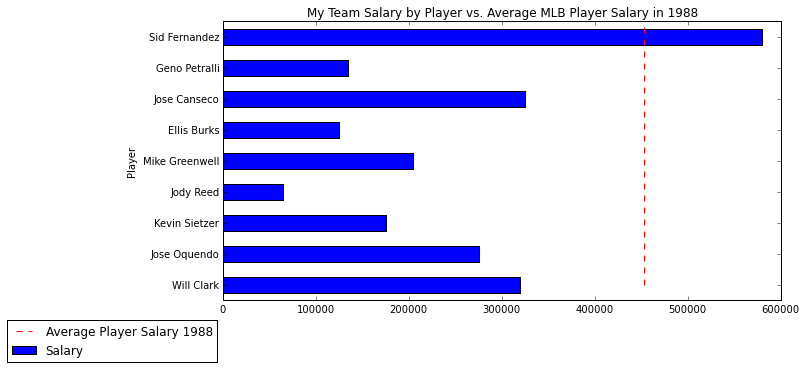

In [15]:
team_frame.plot(x='Player', y="Salary", kind="barh", figsize=(10, 5), legend=True, title="My Team Salary by Player vs. Average MLB Player Salary in 1988")
plt.vlines(mean_salary_1988, ymin=0, ymax=100,color="red", linestyle="dashed", label="Average Player Salary 1988")
plt.legend(bbox_to_anchor=(0, -0.05))
plt.show()

In [16]:
everything4 = everything2[["OBP"]]

In [18]:
everything4.mean()

OBP    0.323951
dtype: float64

In [19]:
avg_obp_mlb = round(0.323951, 3)
avg_obp_mlb

0.324

/Users/ZSeaborn/Desktop/Homework/moneyball/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


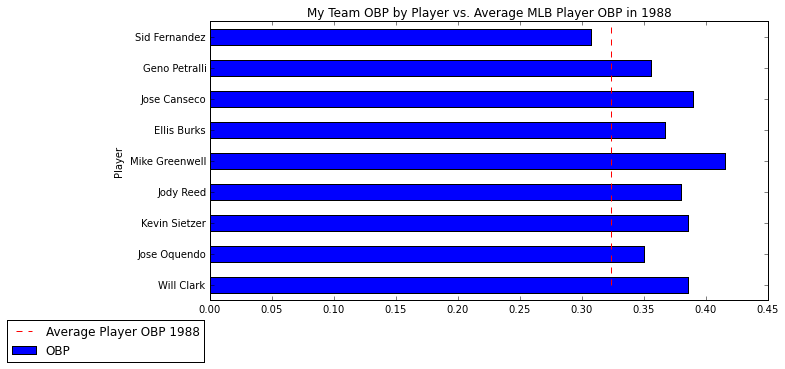

In [20]:
team_frame.plot(x='Player', y="OBP", kind="barh", figsize=(10, 5), legend=True, title="My Team OBP by Player vs. Average MLB Player OBP in 1988")
plt.vlines(avg_obp_mlb, ymin=0, ymax=100,color="red", linestyle="dashed", label="Average Player OBP 1988")
plt.legend(bbox_to_anchor=(0, -0.05))
plt.show()

$1 in 1988 is worth $2.09 in 2015

In [21]:
team_frame["Inflated Salary"] = team_frame["Salary"] * 2.09

In [39]:
team_frame

,OBP,Player,Salary,Inflated Salary
0,0.386,Will Clark,320000,668800
1,0.350,Jose Oquendo,275000,574750
2,0.386,Kevin Sietzer,175000,365750
3,0.380,Jody Reed,64500,134805
4,0.416,Mike Greenwell,205000,428450
5,0.367,Ellis Burks,125000,261250
6,0.390,Jose Canseco,325000,679250
7,0.356,Geno Petralli,135000,282150
8,0.308,Sid Fernandez,580000,1212200


In [40]:
salaries_2014 = salaries[salaries.yearID.isin([2014])]
salaries_2014 = salaries_2014['salary']
salaries_2014.mean()

3980445.9139650874

In [41]:
avg_2014_mlb_sal = round(3980445.9139650874, 2)
avg_2014_mlb_sal

3980445.91

/Users/ZSeaborn/Desktop/Homework/moneyball/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


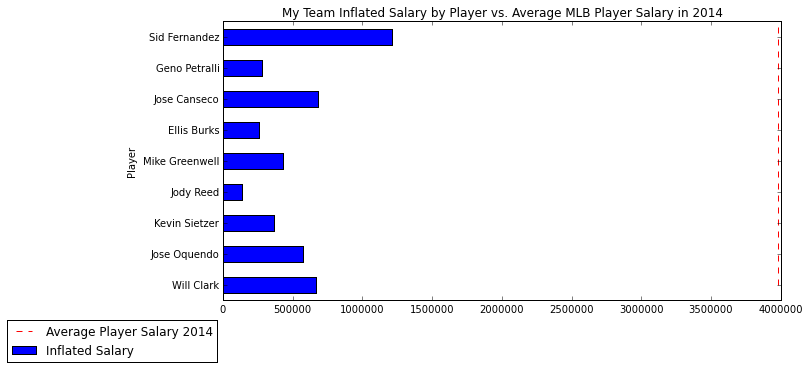

In [42]:
team_frame.plot(x='Player', y="Inflated Salary", kind="barh", figsize=(10, 5), legend=True, title="My Team Inflated Salary by Player vs. Average MLB Player Salary in 2014")
plt.vlines(avg_2014_mlb_sal, ymin=0, ymax=100,color="red", linestyle="dashed", label="Average Player Salary 2014")
plt.legend(bbox_to_anchor=(0, -0.05))
plt.show()